# Laplace Approximation

In [1]:
#@title Import
import jax.numpy as jnp
from scipy.optimize import minimize_scalar
from scipy.integrate import quad
import matplotlib.pyplot as plt

In this notebook, we implement the Laplace approximation of $f(x)$ given by :
\begin{equation}
f(x) = \exp{\left(-\frac{x^2}{2}\right)} \sigma(20x+2),
\end{equation}
where $\sigma$ is the sigmoid function.

Laplace approximation aims to approach this unnormalized distribution by a gaussian distribution $q(x)$. In Bayesian inference, Laplace approximation provides a simple way compute the posterior, or likelihood or even the evidence. The big advantage of this is that it is computationally cheap then another approximation methods like MCMC for instance.

Basically, the approximation is achieved around a mode $x_0$ of the function using the Talyor expansion and the normal approximation is given by :
\begin{equation}
q(x) = \mathcal{N}\left(x|x_0,A^{-1}\right),
\end{equation}

where $x_0$ is the mode i.e $f'(x_0) = 0$ and $A$ is the negative of the second derivative of the $\log$ of $f$ evaluate at $x_0$.


Let's plot the function $f$ above.

In [3]:
#sigmoid function
def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

#Unnormalized distribution
def f(x):
  return jnp.exp(-0.5*x**2)*sigmoid(20*x+2)

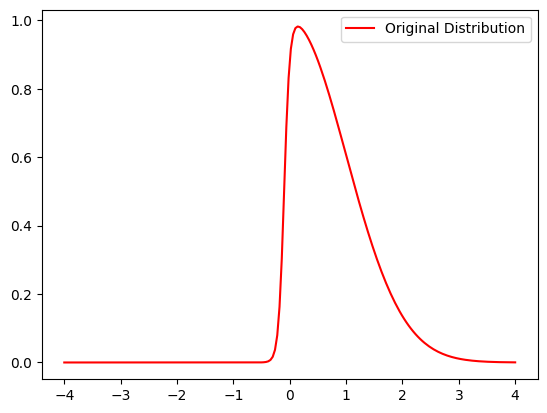

In [4]:
x = jnp.linspace(-4,4,200)
y = f(x)
plt.plot(x, y, color="red", label="Original Distribution")
plt.legend()
plt.show()

As we can see, $f$ has a mode and this corresponds to the maximum of $f$.

In [5]:
#@title Compute the mode

#Maximum of f
max_sol = minimize_scalar(lambda x: -f(x), method='bounded', bounds=(0,1))

mode = max_sol.x

print("Optimal solution of maximum of f :", mode)

Optimal solution of maximum of f : 0.14579313


In [7]:
#@title Evalute negative second derivative of f at the mode
neg_log_f = lambda x: -jnp.log(f(x))

A = jax.hessian(neg_log_f)(mode)
print("Negative hessian at the mode : ", A)
print("Std of Laplace approximation : ", 1/A)

Negative hessian at the mode :  3.8892493
Std of Laplace approximation :  0.25711903


In [6]:
#@title Gaussian density 1D
def gaussian(x, mean, std):
  return jnp.exp(-0.5*(x-mean)**2/std)/jnp.sqrt(2*jnp.pi*std)

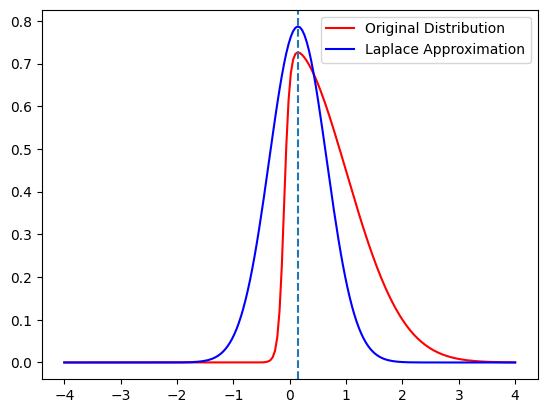

In [8]:
#@title Plotting

#################
x = jnp.linspace(-4,4,200)
#Normalization
Z, _ = quad(f, -jnp.inf, jnp.inf)
original_dist = f(x)/Z

#Laplace approximation
pred_dist = gaussian(x, mode, 1/A)
#################
plt.plot(x, original_dist, color="red", label="Original Distribution")
plt.plot(x, pred_dist, color="blue", label="Laplace Approximation")
plt.axvline(x=mode, linestyle='--')
plt.legend()
plt.show()

Hence, in order to use Laplace approximation, we just need to find a mode and be sure that $A$ is positive. As a deduction from Beinsten-von Misis theorem, sampling from Laplace approximation is well with a huge number of samples.